<h3 style="text-align: center">Drawing tangents with PyTorch</h3>

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

$$ \frac { d }{ dx } ({ x }^{ 2 }-2x-3)=2x-2 $$

In [2]:
def tangent(length,x_target,x,y,samples,gradients):

    #calculate the gradient for x_target
    #select 1st index where x >= x_target
    index = np.where(x.data.numpy() >= x_target)[0][0]

    #determine touch point of tangent to the graphic
    x_val = float(x[index].data.numpy())
    y_val = float(y[index].data.numpy())
    
    #determine gradient(m)
    #m = float(x.grad.data.numpy()[index])
    m = float(gradients[index])

    # calculate tangent
    y_tangent = m*(x-x_val) + y_val

    #convert to np
    x_np = x.data.numpy()
    y_np = y.data.numpy()
    y_tangent_np = y_tangent.data.numpy()
      
    #+-xdiff from center point to draw equal segments of tangent
    xdiff = length * 1/(np.sqrt(1+m**2))
    left  = x_val - xdiff
    right = x_val + xdiff
    i1 = np.where(x_np >= left)[0][0]
    i2 = np.where(x_np >= right)[0][0]

    #tangent
    plt.plot(x_np[i1:i2], y_tangent_np[i1:i2],'b')
    
    #point
    plt.plot(x_val,y_val,'ro')

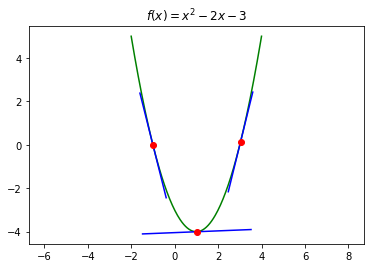

In [3]:
#generate definition domain interval
samples = 150
start = -2
end = 4
x = Variable(torch.Tensor(np.linspace(start, end, samples)), requires_grad=True)
y = x**2 - 2*x - 3

#feed backward() on non scalar tensor with input gradients (1)
#and process all gradients for x values
#x.grad = dy/dx
y.backward(torch.ones(samples))

#save gradients
gradients = x.grad.data.numpy()

%matplotlib inline

#prevent autoscaling
plt.axis("equal")

plt.title(r"$f(x)={ x }^{ 2 }-2x-3$",)

#graph
plt.plot(x.data.numpy(),y.data.numpy(),'g')

#segment length
l = 2.5

x_target=-1
tangent(l,x_target,x,y,samples,gradients)
x_target=1
tangent(l,x_target,x,y,samples,gradients)
x_target=3
tangent(l,x_target,x,y,samples,gradients)

plt.show()
